In [2]:
import pandas as pd
import numpy as np

df= pd.read_csv ('covidReactions_Jan_Aug.csv')


C:\Users\shukl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (24,29,32,40) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#extracting the columns needed
df_covid = df[['VAERS_ID','VAX_MANU','AGE_YRS','SEX','SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5','HOSPDAYS','HOSPITAL','VAX_DOSE_SERIES']]
df_covid.head()

,VAERS_ID,VAX_MANU,AGE_YRS,SEX,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,HOSPDAYS,HOSPITAL,VAX_DOSE_SERIES
0,916600,MODERNA,33.0,F,Dysphagia,Epiglottitis,NaN,NaN,NaN,NaN,NaN,1
1,916601,MODERNA,73.0,F,Anxiety,Dyspnoea,NaN,NaN,NaN,NaN,NaN,1
2,916602,PFIZER\BIONTECH,23.0,F,Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN,NaN,NaN,1
3,916603,MODERNA,58.0,F,Dizziness,Fatigue,Mobility decreased,NaN,NaN,NaN,NaN,UNK
4,916604,MODERNA,47.0,F,Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN,NaN,NaN,1


In [4]:
#deleteing repeated rows 
df_covid.drop_duplicates(keep = 'first') 

,VAERS_ID,VAX_MANU,AGE_YRS,SEX,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,HOSPDAYS,HOSPITAL,VAX_DOSE_SERIES
0,916600,MODERNA,33.0,F,Dysphagia,Epiglottitis,NaN,NaN,NaN,NaN,NaN,1
1,916601,MODERNA,73.0,F,Anxiety,Dyspnoea,NaN,NaN,NaN,NaN,NaN,1
2,916602,PFIZER\BIONTECH,23.0,F,Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN,NaN,NaN,1
3,916603,MODERNA,58.0,F,Dizziness,Fatigue,Mobility decreased,NaN,NaN,NaN,NaN,UNK
4,916604,MODERNA,47.0,F,Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
603457,1514845,PFIZER\BIONTECH,33.0,F,Lethargy,Malaise,Nausea,Seizure,Syncope,2.0,Y,1
603458,1514845,PFIZER\BIONTECH,33.0,F,Unresponsive to stimuli,Vomiting,NaN,NaN,NaN,2.0,Y,1
603459,1514847,PFIZER\BIONTECH,20.0,F,Incorrect dose administered,NaN,NaN,NaN,NaN,NaN,NaN,1
603460,1514848,PFIZER\BIONTECH,23.0,F,Incorrect product formulation administered,NaN,NaN,NaN,NaN,NaN,NaN,1


In [5]:
#changed the names
df_covid_new = df_covid.rename(columns={'VAX_MANU': 'Vaccine_Manufacturer','AGE_YRS':'Age','SEX':'Gender','SYMPTOM1':'Symptom1','SYMPTOM2':'Symptom2','SYMPTOM3':'Symptom3','SYMPTOM4':'Symptom4','SYMPTOM5':'Symptom5','HOSPITAL':'Hospital','HOSPDAYS':'HospitalDays'})

In [6]:
# the count of vaccine manufacturers 
df_covid_new.Vaccine_Manufacturer.value_counts()

PFIZER\BIONTECH         271633
MODERNA                 265652
JANSSEN                  64753
UNKNOWN MANUFACTURER      1424
Name: Vaccine_Manufacturer, dtype: int64

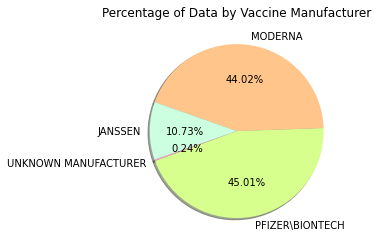

In [7]:
# Percentage of Data by Vaccine Manufacturer

import matplotlib.pyplot as plt
label = list(df_covid_new.Vaccine_Manufacturer.value_counts().index)
colour = ['#d6ff8e','#ffc58a','#ccffdf','#f5b0cb']

title = plt.title('Percentage of Data by Vaccine Manufacturer')
plt.pie(df_covid_new.Vaccine_Manufacturer.value_counts(), labels = label,startangle = 200, shadow = True,colors = colour,autopct='%1.2f%%')
#plt.legend(title = 'Vaccine Manufacturer', bbox_to_anchor=(1,0.7))
plt.show() 

In [8]:
## deleting the rows with Janssen and unknown Manufacturer Vaccine
delete_Other_Manu = df_covid_new[df_covid_new['Vaccine_Manufacturer']=='UNKNOWN MANUFACTURER'].index
df_covid_new.drop(delete_Other_Manu,inplace = True)

delete_Janssen = df_covid_new[df_covid_new['Vaccine_Manufacturer']=='JANSSEN'].index
df_covid_new.drop(delete_Janssen,inplace = True)

##checked the count of vaccines
df_covid_new.Vaccine_Manufacturer.value_counts()


PFIZER\BIONTECH    271633
MODERNA            265652
Name: Vaccine_Manufacturer, dtype: int64

In [9]:
#drop rows with null values in age
df_covid_new.dropna(subset=['Age'],inplace = True)

#Keep rows containing dose 1 only
delete_dose2 = df_covid_new[df_covid_new['VAX_DOSE_SERIES']=='1'].index
df_covid_new.drop(delete_dose2,inplace = True)

## segerate according to age groups 
df_covid_new.loc[((df_covid_new['Age']>18) & (df_covid_new['Age']<30)), 'Age_Group'] = '18-30'
df_covid_new.loc[((df_covid_new['Age']>=30) & (df_covid_new['Age']<40)), 'Age_Group'] = '30-40'
df_covid_new.loc[((df_covid_new['Age']>=40) & (df_covid_new['Age']<50)), 'Age_Group'] = '40-50'
df_covid_new.loc[((df_covid_new['Age']>=50) & (df_covid_new['Age']<60)), 'Age_Group'] = '50-60'
df_covid_new.loc[((df_covid_new['Age']>=60) & (df_covid_new['Age']<70)), 'Age_Group'] = '60-70'
df_covid_new.loc[((df_covid_new['Age']>=70) & (df_covid_new['Age']<80)), 'Age_Group'] = '70-80'
df_covid_new.loc[(df_covid_new['Age']>= 80), 'Age_Group'] = '80s+'

print(df_covid_new.Age_Group.value_counts())

50-60    45735
60-70    44997
40-50    44866
30-40    43652
70-80    28683
18-30    28078
80s+     12663
Name: Age_Group, dtype: int64


In [10]:
df_Moderna = df_covid_new[df_covid_new['Vaccine_Manufacturer'] =='MODERNA'].copy()
df_Pfizer =  df_covid_new[df_covid_new['Vaccine_Manufacturer'] =='PFIZER\BIONTECH'].copy()

#delete rows with unkown age
mod_null_age = df_Moderna[df_Moderna.Age == 'Unknown'].index
df_Moderna.drop(mod_null_age,inplace= True)

pfizer_null_age = df_Pfizer[df_Pfizer.Age == 'Unknown'].index
df_Pfizer.drop(pfizer_null_age,inplace= True)


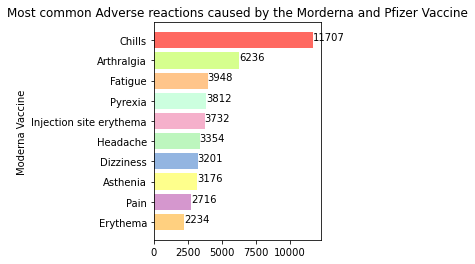

In [11]:
moderna_Symptom = df_Moderna.Symptom1.value_counts().sort_values(ascending=False).head(10)
moderna_Symptom = moderna_Symptom.sort_values()
moderna_color = ['#ffd080','#d597ce','#feff8c','#93b5e1','#bdf6be','#f5b0cb','#ccffdf','#ffc58a','#d6ff8e','#ff6961'];

plt.figure(figsize=(3,4))
plt.barh(moderna_Symptom.index,moderna_Symptom.values,color=moderna_color )
plt.title('Most common Adverse reactions caused by the Morderna and Pfizer Vaccine')
plt.ylabel('Moderna Vaccine')
for index, value in enumerate(moderna_Symptom.values):
    plt.text(value, index, str(value))
plt.show()

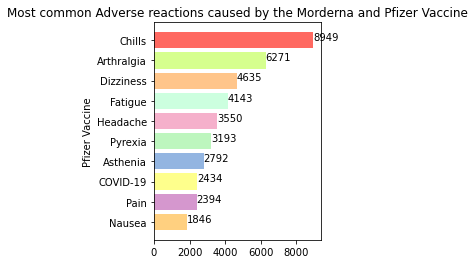

In [12]:
pfizer_Symptom = df_Pfizer.Symptom1.value_counts().sort_values(ascending=False).head(10)
pfizer_Symptom = pfizer_Symptom.sort_values()
pfizer_color = ['#ffd080','#d597ce','#feff8c','#93b5e1','#bdf6be','#f5b0cb','#ccffdf','#ffc58a','#d6ff8e','#ff6961'];

plt.figure(figsize=(3,4))
plt.barh(pfizer_Symptom.index,pfizer_Symptom.values,color=pfizer_color)
plt.title('Most common Adverse reactions caused by the Morderna and Pfizer Vaccine')
plt.ylabel('Pfizer Vaccine')

for index, value in enumerate(pfizer_Symptom.values):
    plt.text(value, index, str(value))
    
plt.show()

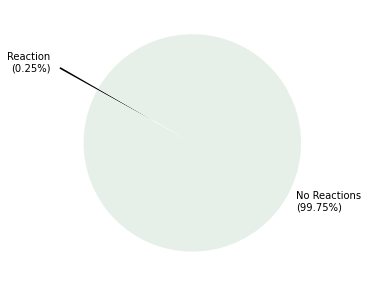

In [13]:
import matplotlib.pyplot as plt
import numpy as np
#chance of getting a reaction from the pfizer
y = np.array([271633,107530116])
mylabels = ["Reaction\n(0.25%)", "No Reactions\n(99.75%)"]
plt.figure(figsize=(5,5))
myexplode = [0.4,0]

plt.pie(y,labels = mylabels,explode = myexplode,startangle = 150,colors = ['#000000','#e6f0e9'])
plt.show() 

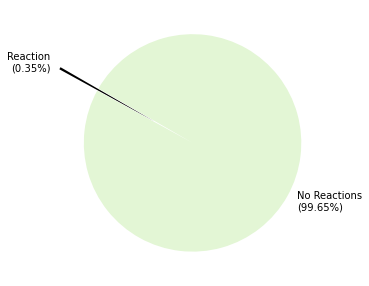

In [14]:
#chance of getting a reaction from the Morderna
y = np.array([265652,76310233])
mylabels = ["Reaction\n(0.35%)", "No Reactions\n(99.65%)"]
plt.figure(figsize=(5,5))
myexplode = [0.4,0]

plt.pie(y,labels = mylabels,explode = myexplode,startangle = 150,colors = ['#000000','#e3f6d5'])
plt.show() 

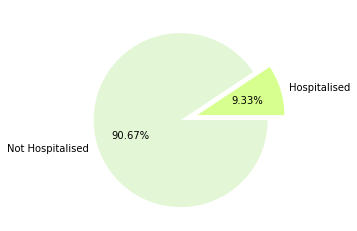

In [15]:
#no. of hospitalisations after an adverse reaction to MODERNA
lbls = 'Hospitalised','Not Hospitalised'
mod_hospitalised = round(list((df_Moderna.Hospital.value_counts().values/df_Moderna.shape[0])*100)[0],2)
mod_hospital_no = 100 - mod_hospitalised
vals= [mod_hospitalised,mod_hospital_no]
myexplode = [0,0.2]
plt.pie(vals,labels= lbls,startangle = 360,explode = myexplode,autopct = '%1.2f%%', colors = ['#d6ff8e','#e3f6d5'])
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

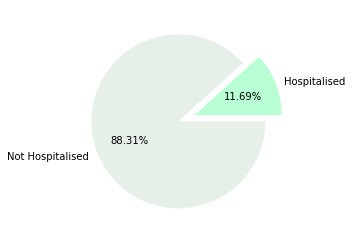

In [16]:
#no. of hospitalised after an adverse reaction - PFIZER
pfizer_hospitalised = round(list((df_Pfizer.Hospital.value_counts().values/df_Pfizer.shape[0])*100)[0],2)
pfizer_hospital_no = 100 - pfizer_hospitalised
pfizer_vals = [pfizer_hospitalised,pfizer_hospital_no]
myexplode = [0,0.2]
plt.pie(pfizer_vals,labels= lbls,startangle = 360,explode = myexplode,autopct = '%1.2f%%', colors = ['#b8ffd3','#e6f0e9'])
plt.show

In [17]:
#create new dataframe 
mod_hospitalised = df_Moderna[~df_Moderna.Hospital.isna()]
pfizer_hospitalised = df_Pfizer[~df_Pfizer.Hospital.isna()]

#delete null values in data
#delete rows with more than 30 days
mod_null_hospital = mod_hospitalised[mod_hospitalised.HospitalDays>=30].index
mod_hospitalised.drop(mod_null_hospital,inplace = True)

pfizer_null_hospital = pfizer_hospitalised[pfizer_hospitalised.HospitalDays>=30].index
pfizer_hospitalised.drop(pfizer_null_hospital,inplace = True)


C:\Users\shukl\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\shukl\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Text(0.5, 0, 'Days in Hospital')

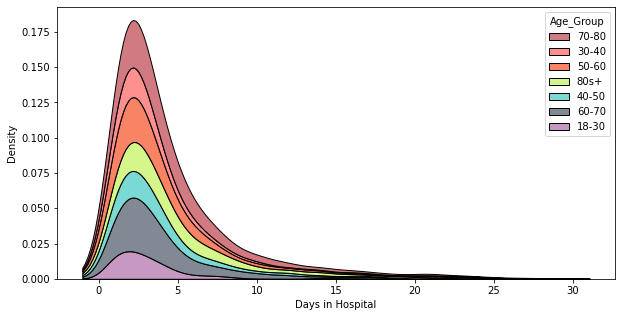

In [18]:
import seaborn as sns
mod_color = ['#C44D58','#FF6B6B','#F85931','#C7F464','#4ECDC4','#556270','#B576AD'];
plt.figure(figsize=(10,5))
sns.kdeplot(mod_hospitalised.HospitalDays, hue = mod_hospitalised.Age_Group,multiple='stack',palette = mod_color).set_xlabel('Days in Hospital')


Text(0.5, 0, 'Days in Hospital')

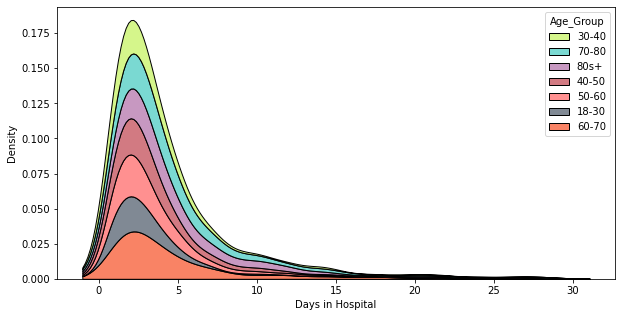

In [19]:
pfizer_color = ['#C7F464','#4ECDC4' ,'#B576AD' ,'#C44D58','#FF6B6B','#556270','#F85931'];
plt.figure(figsize=(10,5))
sns.kdeplot(pfizer_hospitalised.HospitalDays, hue = pfizer_hospitalised.Age_Group,multiple='stack',palette = pfizer_color).set_xlabel('Days in Hospital')